# Graph Representation in data structure

## For unweighted directed graph

In [1]:
import numpy as np

In [2]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

In [3]:
size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))

adjacency_matrix  # skeleton matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
size = len(V)
adjacency_matrix = [[0 for _ in range(size)] for _ in range(size)]

adjacency_matrix  # skeleton matrix

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

### adjacency_matrix: np array

In [5]:
size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))

for (i, j) in E:
  adjacency_matrix[i, j] = 1

adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### adjacency_matrix: python nested list

In [6]:
size = len(V)
adjacency_matrix = [[0 for _ in range(size)] for _ in range(size)]

for (i, j) in E:
  adjacency_matrix[i][j] = 1

adjacency_matrix

[[0, 1, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0]]

### adjacency_list: python dictionary

In [7]:
size = len(V)
adjacency_list = {}

for i in range(size):
  adjacency_list[i] = []

adjacency_list

{0: [], 1: [], 2: [], 3: [], 4: []}

In [8]:
size = len(V)
adjacency_list = {}

for i in range(size):
  adjacency_list[i] = []
for (i, j) in E:
  adjacency_list[i].append(j)

adjacency_list

{0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

In [9]:
size = len(V)
adjacency_list = {}

for (i, j) in E:
  if i not in adjacency_list:
    adjacency_list[i] = []
  adjacency_list[i].append(j)

adjacency_list

{0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4]}

## For unweighted undirected graph

In [10]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

print(E)  # original edges
print([(j, i) for (i, j) in E])  # reversed edges

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]
[(1, 0), (2, 0), (3, 1), (4, 1), (4, 2), (3, 2), (4, 3)]


In [11]:
UE = E + [(j, i) for (i, j) in E]  # original + reversed
print(UE)

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4), (1, 0), (2, 0), (3, 1), (4, 1), (4, 2), (3, 2), (4, 3)]


# Breadth First Search(BFS) 

In [12]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    if self.is_empty():
      return
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)
print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())

print(queue)

10
20
30
[40]


## Implementation BFS for adjacency list

In [13]:
def bfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False
  # print(f'{visited=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_adjacency_list(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

## Implementation BFS for adjacency matrix

In [14]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

size = len(V)
adjacency_matrix = np.zeros(shape=(size, size))
for (i, j) in E:
  adjacency_matrix[i, j] = 1

adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [15]:
def get_neighbors(adjacency_matrix, vertex):
  rows, cols = adjacency_matrix.shape
  neighbors = []
  for j in range(cols):
    if adjacency_matrix[vertex, j] == 1:
      neighbors.append(j)
  return neighbors


get_neighbors(adjacency_matrix, 0)

[1, 2]

In [16]:
def bfs_adjacency_matrix(adjacency_matrix, start_vertex):
  rows, cols = adjacency_matrix.shape
  visited = {}
  for i in range(rows):
    visited[i] = False
  # print(f'{visited=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = get_neighbors(adjacency_matrix, curr_vertex)
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True

  return visited


bfs_adjacency_matrix(adjacency_matrix, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

## Find parent of each vertex using BFS

In [17]:
def bfs_parent(adjacency_list, start_vertex):
  visited, parent = {}, {}
  for vertex in adjacency_list:
    visited[vertex] = False
    parent[vertex] = -1
  # print(f'{visited=}, {parent=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True
      parent[adj_vertex] = curr_vertex

  return (visited, parent)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_parent(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True},
 {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})

## Find level number of vertices using BFS

In [18]:
def bfs_level(adjacency_list, start_vertex):
  level, parent = {}, {}
  for vertex in adjacency_list:
    level[vertex] = -1  # -1 means NOT visited
    parent[vertex] = -1

  queue = Queue()
  queue.enqueue(start_vertex)
  level[start_vertex] = 0

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if level[adj_vertex] != -1:  # skip if already visited
        continue
      queue.enqueue(adj_vertex)
      level[adj_vertex] = level[curr_vertex] + 1
      parent[adj_vertex] = curr_vertex

  return (level, parent)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

# ({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})
bfs_level(adjacency_list, 0)

({0: 0, 1: 1, 2: 1, 3: 2, 4: 2}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 1})

# Depth First Search(DFS)

In [19]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    if self.is_empty():
      raise Exception('stack is empty')
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


## DFS for adjacency list [using Stack]

In [20]:
def dfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False

  stack = Stack()
  stack.push(start_vertex)

  while not stack.is_empty():
    curr_vertex = stack.pop()
    if visited[curr_vertex]:
      continue
    visited[curr_vertex] = True
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_adjacency_list(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

### With parent information

In [21]:
def dfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  parent = {}
  for vertex in adjacency_list:
    visited[vertex] = False
    parent[vertex] = -1

  stack = Stack()
  stack.push(start_vertex)

  while not stack.is_empty():
    print(f'stack={stack}, {parent=}')
    curr_vertex = stack.pop()
    print(f'{curr_vertex=}\n')
    if visited[curr_vertex]:
      continue
    visited[curr_vertex] = True
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)
        parent[adj_vertex] = curr_vertex
        # if parent[adj_vertex] == -1:
        #   parent[adj_vertex] = curr_vertex

  return (visited, parent)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_adjacency_list(adjacency_list, 0)

stack=[0], parent={0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
curr_vertex=0

stack=[1, 2], parent={0: -1, 1: 0, 2: 0, 3: -1, 4: -1}
curr_vertex=2

stack=[1, 4, 3], parent={0: -1, 1: 0, 2: 0, 3: 2, 4: 2}
curr_vertex=3

stack=[1, 4, 4], parent={0: -1, 1: 0, 2: 0, 3: 2, 4: 3}
curr_vertex=4

stack=[1, 4], parent={0: -1, 1: 0, 2: 0, 3: 2, 4: 3}
curr_vertex=4

stack=[1], parent={0: -1, 1: 0, 2: 0, 3: 2, 4: 3}
curr_vertex=1



({0: True, 1: True, 2: True, 3: True, 4: True},
 {0: -1, 1: 0, 2: 0, 3: 2, 4: 3})

## DFS for adjacency list [recursive]

In [22]:
def init_dfs_recursive(adjacency_list):
  visited, parent = {}, {}
  for vertex in adjacency_list:
    visited[vertex] = False
    parent[vertex] = -1
  return (visited, parent)

In [23]:
def dfs_adjacency_list_recursive(adjacency_list, curr_vertex, visited, parent):
  visited[curr_vertex] = True

  neighbors = adjacency_list[curr_vertex]
  for adj_vertex in neighbors:
    if not visited[adj_vertex]:
      parent[adj_vertex] = curr_vertex
      visited, parent = dfs_adjacency_list_recursive(adjacency_list, adj_vertex, visited, parent)

  return (visited, parent)


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
visited, parent = init_dfs_recursive(adjacency_list)
dfs_adjacency_list_recursive(adjacency_list, 0, visited, parent)

({0: True, 1: True, 2: True, 3: True, 4: True},
 {0: -1, 1: 0, 2: 0, 3: 1, 4: 3})

### With global variables `visited`, `parent`

In [24]:
visited, parent = {}, {}


def init_dfs_recursive(adjacency_list):
  for vertex in adjacency_list:
    visited[vertex] = False
    parent[vertex] = -1
  return

In [25]:
def dfs_adjacency_list_recursive(adjacency_list, curr_vertex):
  visited[curr_vertex] = True

  neighbors = adjacency_list[curr_vertex]
  for adj_vertex in neighbors:
    if not visited[adj_vertex]:
      parent[adj_vertex] = curr_vertex
      dfs_adjacency_list_recursive(adjacency_list, adj_vertex)

  return


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
init_dfs_recursive(adjacency_list)
dfs_adjacency_list_recursive(adjacency_list, 0)
print(visited, parent)

{0: True, 1: True, 2: True, 3: True, 4: True} {0: -1, 1: 0, 2: 0, 3: 1, 4: 3}


## DFS for adjacency matrix [using Stack]

In [26]:
V = [0, 1, 2, 3, 4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]
size = len(V)

adjacency_matrix = np.zeros(shape=(size, size))
for (i, j) in E:
  adjacency_matrix[i, j] = 1

adjacency_matrix

array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [27]:
def dfs_adjacency_matrix(adjacency_matrix, start_vertex):
  visited = {}
  rows, cols = adjacency_matrix.shape
  for i in range(rows):
    visited[i] = False

  stack = Stack()
  stack.push(start_vertex)

  while not stack.is_empty():
    curr_vertex = stack.pop()
    if visited[curr_vertex]:
      continue
    visited[curr_vertex] = True
    neighbors = get_neighbors(adjacency_matrix, curr_vertex)
    for adj_vertex in neighbors:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)

  return visited


dfs_adjacency_matrix(adjacency_matrix, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

### With parent information

In [28]:
def dfs_adjacency_matrix(adjacency_matrix, start_vertex):
  visited = {}
  parent = {}
  rows, cols = adjacency_matrix.shape
  for i in range(rows):
    visited[i] = False
    parent[i] = -1

  stack = Stack()
  stack.push(start_vertex)

  while not stack.is_empty():
    print(f'stack={stack}, {parent}')
    curr_vertex = stack.pop()
    print(f'{curr_vertex=}\n')
    if visited[curr_vertex]:
      continue
    visited[curr_vertex] = True
    neighbors = get_neighbors(adjacency_matrix, curr_vertex)
    for adj_vertex in neighbors:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)
        parent[adj_vertex] = curr_vertex
        # if parent[adj_vertex] == -1:
        #   parent[adj_vertex] = curr_vertex

  return (visited, parent)


dfs_adjacency_matrix(adjacency_matrix, 0)

stack=[0], {0: -1, 1: -1, 2: -1, 3: -1, 4: -1}
curr_vertex=0

stack=[1, 2], {0: -1, 1: 0, 2: 0, 3: -1, 4: -1}
curr_vertex=2

stack=[1, 3, 4], {0: -1, 1: 0, 2: 0, 3: 2, 4: 2}
curr_vertex=4

stack=[1, 3], {0: -1, 1: 0, 2: 0, 3: 2, 4: 2}
curr_vertex=3

stack=[1], {0: -1, 1: 0, 2: 0, 3: 2, 4: 2}
curr_vertex=1



({0: True, 1: True, 2: True, 3: True, 4: True},
 {0: -1, 1: 0, 2: 0, 3: 2, 4: 2})

# Find connected components using BFS

In [29]:
def bfs_adjacency_list(adjacency_list, start_vertex):
  visited = {}
  for vertex in adjacency_list:
    visited[vertex] = False
  # print(f'{visited=}')

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    neighbors = adjacency_list[curr_vertex]
    for adj_vertex in neighbors:
      if visited[adj_vertex]:
        continue
      queue.enqueue(adj_vertex)
      visited[adj_vertex] = True

  return visited


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs_adjacency_list(adjacency_list, 0)

{0: True, 1: True, 2: True, 3: True, 4: True}

In [30]:
# iitm code (i made it better): this is best way?? 😐

def find_connected_components(adjacency_list):
  component = {}
  for vertex in adjacency_list:
    component[vertex] = -1

  component_id, seen = 0, 0

  while seen < len(adjacency_list):
    unseen_vertices = [vertex for vertex in adjacency_list if component[vertex] == -1]
    start_vertex = unseen_vertices[0]
    visited = bfs_adjacency_list(adjacency_list, start_vertex)
    # print(f'{start_vertex=}, {visited=}, {component_id=}')
    for vertex in visited:
      if visited[vertex]:
        seen += 1
        component[vertex] = component_id
    component_id += 1

  return component


adjacency_list = {0: [1], 1: [2], 2: [0], 3: [4, 6], 4: [3, 7], 5: [3, 7], 6: [5], 7: [4, 8], 8: [5, 9], 9: [8]}
find_connected_components(adjacency_list)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

In [31]:
# my code: how sweet 😍

def find_connected_components(adjacency_list):
  component = {}
  for vertex in adjacency_list:
    component[vertex] = -1

  component_id = 0

  for start_vertex in adjacency_list:
    if component[start_vertex] == -1:
      visited = bfs_adjacency_list(adjacency_list, start_vertex)
      # print(f'{start_vertex=}, {visited=}, {component_id=}')
      for vertex in visited:
        if visited[vertex]:
          component[vertex] = component_id
      component_id += 1

  return component


adjacency_list = {0: [1], 1: [2], 2: [0], 3: [4, 6], 4: [3, 7], 5: [3, 7], 6: [5], 7: [4, 8], 8: [5, 9], 9: [8]}
find_connected_components(adjacency_list)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

# Pre and Post numbering using DFS

In [37]:
# 0
# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9
# 0 1
# 0 4
# 1 0
# 4 0
# 4 8
# 4 9
# 8 4
# 8 9
# 9 8
# 9 4

# 0: [1, 4], 1: [0], 2: [], 3: [], 4: [0, 8, 9], 5: [], 6: [], 7: [], 8: [4, 9], 9: [8, 4]

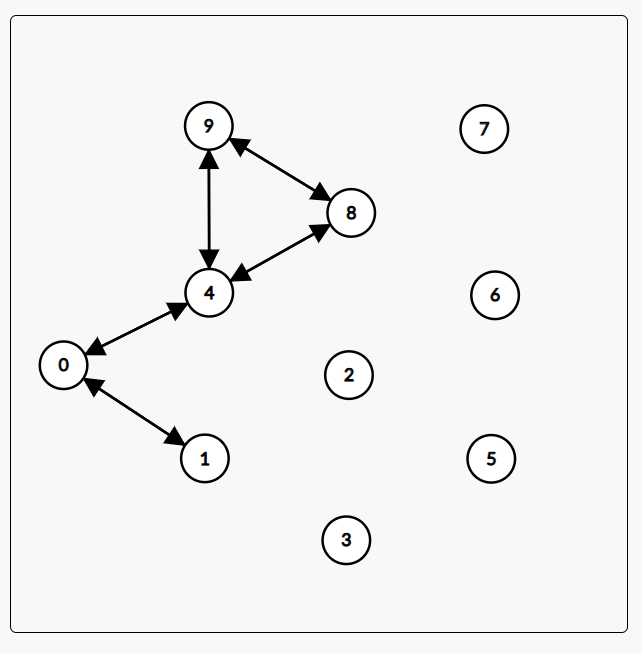

In [35]:
adjacency_list = {
    0: [1, 4], 1: [0], 2: [], 3: [], 4: [0, 8, 9], 5: [], 6: [], 7: [], 8: [4, 9], 9: [8, 4]
}

In [38]:
def init_dfs_recursive(adjacency_list):
  visited, pre, post = {}, {}, {}
  for vertex in adjacency_list:
    visited[vertex] = False
    pre[vertex], post[vertex] = -1, -1
  return (visited, pre, post)

In [59]:
def pre_post_numbering(adjacency_list, curr_vertex, count):
  visited[curr_vertex] = True

  pre[curr_vertex] = count  # entering the vertex
  count += 1

  neighbors = adjacency_list[curr_vertex]
  for adj_vertex in neighbors:
    if not visited[adj_vertex]:
      count = pre_post_numbering(adjacency_list, adj_vertex, count)

  post[curr_vertex] = count  # leaving the vertex
  count += 1

  return count


visited, pre, post = init_dfs_recursive(adjacency_list)

print(pre_post_numbering(adjacency_list, 0, 0) == 10)
print(visited == {0: True, 1: True, 2: False, 3: False, 4: True, 5: False, 6: False, 7: False, 8: True, 9: True})
print(pre == {0: 0, 1: 1, 2: -1, 3: -1, 4: 3, 5: -1, 6: -1, 7: -1, 8: 4, 9: 5})
print(post == {0: 9, 1: 2, 2: -1, 3: -1, 4: 8, 5: -1, 6: -1, 7: -1, 8: 7, 9: 6})

True
True
True
True


In [60]:
for vertex in adjacency_list:
  print(f'{vertex}: ({pre[vertex]}, {post[vertex]})')

0: (0, 9)
1: (1, 2)
2: (-1, -1)
3: (-1, -1)
4: (3, 8)
5: (-1, -1)
6: (-1, -1)
7: (-1, -1)
8: (4, 7)
9: (5, 6)


In [90]:
def check_edge(u, v):
  # forward edge, if interval [pre(u), post(u)] contains [pre(v), post(v)]
  # e.g., u=[1, 10], v=[3, 5]
  if pre[u] <= pre[v] and post[u] >= post[v]:
    return 'forward edge'

  # back edge, if interval [pre(v), post(v)] contains [pre(u), post(u)]
  # e.g., u=[3, 5], v=[1, 10]
  if pre[v] <= pre[u] and post[v] >= post[u]:
    return 'back edge'

  # cross edge, if intervals [pre(u), post(u)] and [pre(v), post(v)] are disjoint
  # e.g., u=[1, 2], v=[3, 4]
  # e.g., u=[7, 9], v=[2, 5]
  if post[u] < pre[v] or post[v] < pre[u]:
    return 'cross edge'


print(check_edge(9, 1))

cross edge


# DAG Topological Sort

In [112]:
def dag_topological_sort(adjacency_list):
  # initialize in-degree dictionary with all vertices at 0
  in_degree = {vertex: 0 for vertex in adjacency_list}

  # calculate in-degrees
  for neighbors in adjacency_list.values():
    for adj_vertex in neighbors:
      in_degree[adj_vertex] += 1
  print(f'{in_degree=}')

  # initialize queue with vertices having in-degree 0
  queue = Queue()
  for vertex, degree in in_degree.items():
    if degree == 0:
      queue.enqueue(vertex)

  # list to store sorted order
  sorted_list = []

  while not queue.is_empty():
    # dequeue a vertex with in-degree 0
    curr_vertex = queue.dequeue()
    sorted_list.append(curr_vertex)

    # reduce in-degree of current vertex's neighbors
    for adj_vertex in adjacency_list[curr_vertex]:
      in_degree[adj_vertex] -= 1

      # enqueue neighbors with in-degree 0
      if in_degree[adj_vertex] == 0:
        queue.enqueue(adj_vertex)

  return sorted_list


adjacency_list = {0: [2, 3, 4], 1: [2, 7], 2: [5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
dag_topological_sort(adjacency_list) == [0, 1, 3, 4, 2, 5, 6, 7]

in_degree={0: 0, 1: 0, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 4}


True

# DAG Longest path

In [129]:
def dag_longest_path(adjacency_list):
  # initialize in-degree and longest path dictionaries
  in_degree, longest_path = {}, {}
  for vertex in adjacency_list:
    in_degree[vertex], longest_path[vertex] = 0, 0

  # calculate in-degrees
  for neighbors in adjacency_list.values():
    for adj_vertex in neighbors:
      in_degree[adj_vertex] += 1
  print(f'{in_degree=}, {longest_path=}')

  # initialize queue with vertices having in-degree 0
  queue = Queue()
  for vertex, degree in in_degree.items():
    if degree == 0:
      queue.enqueue(vertex)

  while not queue.is_empty():
    # dequeue a vertex with in-degree 0
    curr_vertex = queue.dequeue()
    in_degree[curr_vertex] -= 1

    # update longest path and reduce in-degree of neighbors
    for adj_vertex in adjacency_list[curr_vertex]:
      in_degree[adj_vertex] -= 1
      longest_path[adj_vertex] = max(longest_path[adj_vertex], longest_path[curr_vertex] + 1)
      # enqueue neighbors with in-degree 0
      if in_degree[adj_vertex] == 0:
        queue.enqueue(adj_vertex)

  return longest_path


adjacency_list = {0: [2, 3, 4], 1: [2, 7], 2: [5], 3: [5, 7], 4: [7], 5: [6], 6: [7], 7: []}
dag_longest_path(adjacency_list) == {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4}

in_degree={0: 0, 1: 0, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 4}, longest_path={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}


True